In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('WineQT.csv')

In [3]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [6]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (1143, 13)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [8]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [9]:
print(f"\nDuplicates: {df.duplicated().sum()}")


Duplicates: 0


Wine Quality Distribution:
quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: count, dtype: int64


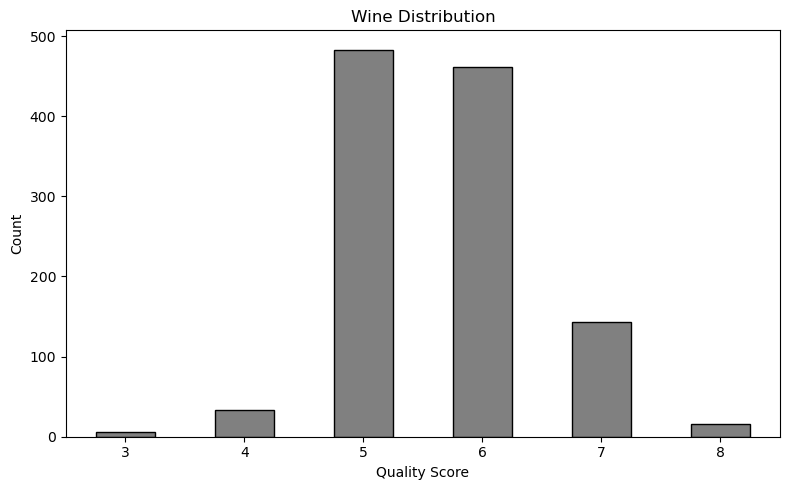

In [10]:
print("Wine Quality Distribution:")
print(df['quality'].value_counts().sort_index())

plt.figure(figsize=(8, 5))
df['quality'].value_counts().sort_index().plot(kind='bar', color='grey', edgecolor='black')
plt.title('Wine Distribution')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


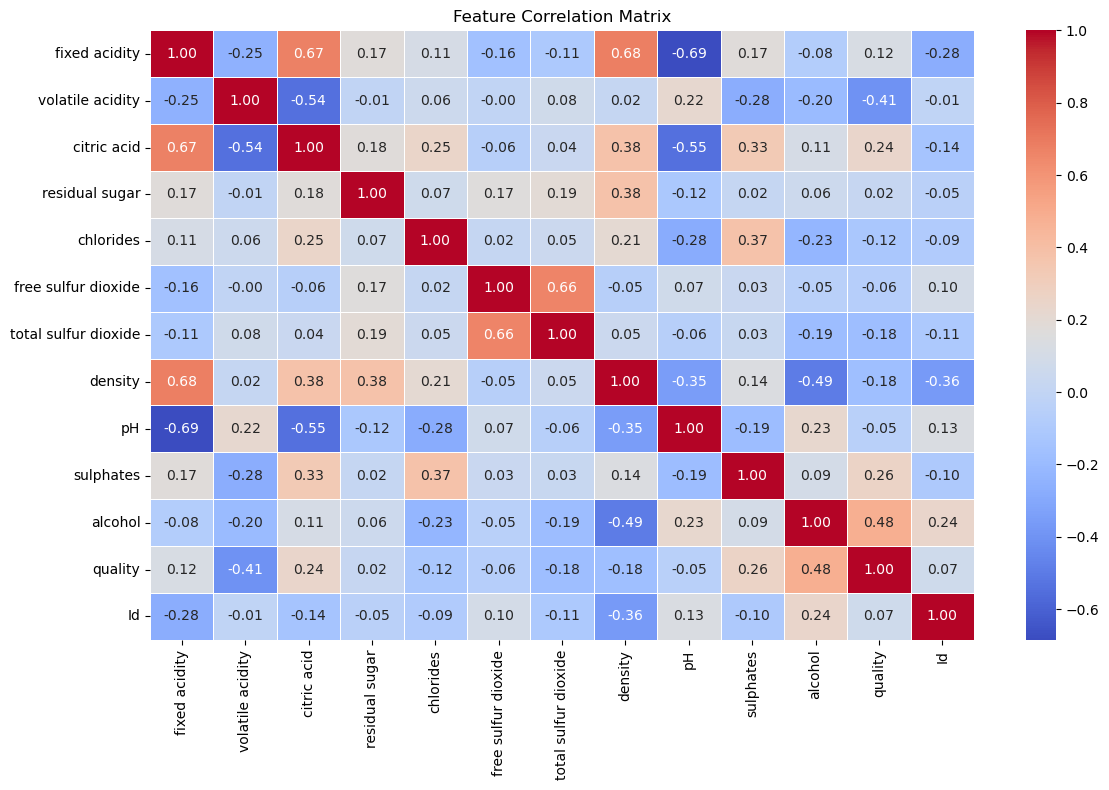

In [12]:
plt.figure(figsize=(12, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

Text(0.5, 1.0, 'Density vs Wine Quality')

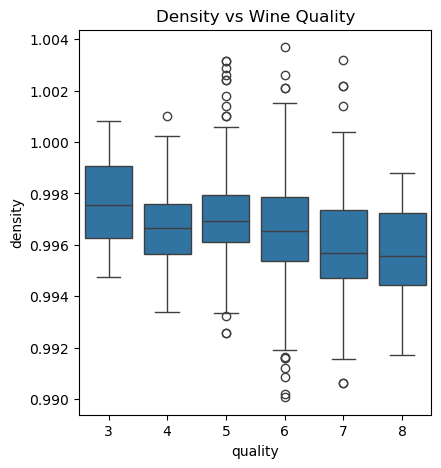

In [13]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='quality', y='density', data=df)
plt.title('Density vs Wine Quality')

Text(0.5, 1.0, 'pH (Acidity) vs Wine Quality')

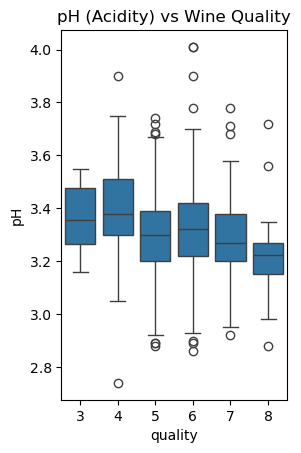

In [14]:
plt.subplot(1, 2, 2)
sns.boxplot(x='quality', y='pH', data=df)
plt.title('pH (Acidity) vs Wine Quality')

In [15]:
plt.tight_layout()
plt.savefig('density_acidity_analysis.png')
plt.show()

<Figure size 640x480 with 0 Axes>

In [17]:
X = df.drop('quality', axis=1)
y = df['quality']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (1143, 11)
Target shape: (1143,)


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Done")

Done


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 914 samples
Testing set: 229 samples


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Random Forest Accuracy: 0.6943


In [21]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(max_iter=1000, random_state=42)
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)
sgd_accuracy = accuracy_score(y_test, y_pred_sgd)
print(f"SGD Accuracy: {sgd_accuracy:.4f}")

SGD Accuracy: 0.6026


In [22]:
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf', random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, y_pred_svc)
print(f"SVC Accuracy: {svc_accuracy:.4f}")

SVC Accuracy: 0.6376


In [23]:
print("="*50)
print("RANDOM FOREST - DETAILED RESULTS")
print("="*50)
print(classification_report(y_test, y_pred_rf))

RANDOM FOREST - DETAILED RESULTS
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.80      0.76        96
           6       0.67      0.66      0.66        99
           7       0.68      0.65      0.67        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.41      0.42      0.42       229
weighted avg       0.67      0.69      0.68       229



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


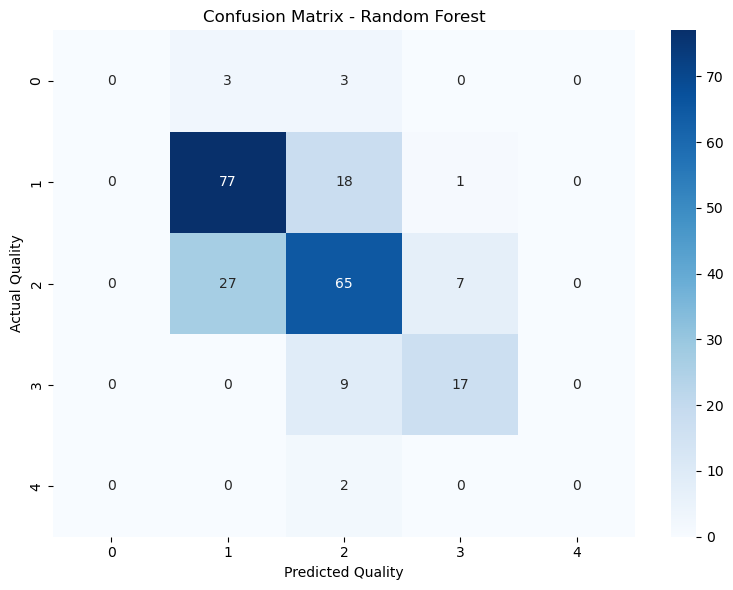

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Quality')
plt.ylabel('Actual Quality')
plt.tight_layout()
plt.savefig('confusionMatrix.png')
plt.show()

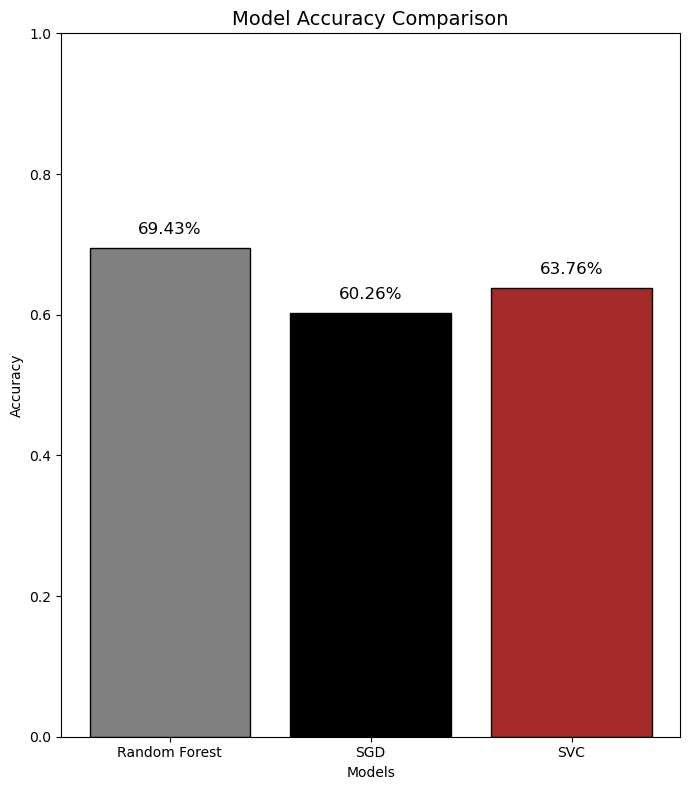

In [32]:
models = ['Random Forest', 'SGD', 'SVC']
accuracies = [rf_accuracy, sgd_accuracy, svc_accuracy]

plt.figure(figsize=(7, 8))
plt.bar(models, accuracies, color=['grey', 'black', 'brown'], edgecolor='black')
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f'{v:.2%}', ha='center', fontsize=12)
plt.tight_layout()
plt.savefig('ModelComparison.png')
plt.show()